In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("../data/city_temperature.csv", low_memory=False)


In [28]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature    celsius
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2  17.888889
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   9.666667
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   9.333333
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   8.000000
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   8.833333


In [29]:
print(df.Year.value_counts().index)

Int64Index([2000, 1999, 2001, 2002, 2003, 1998, 1996, 1997, 2004, 1995, 2005,
            2006, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020],
           dtype='int64')


In [31]:
print(df['Year'].value_counts()[-10:])

2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
Name: Year, dtype: int64


In [16]:
df = df[df['Year'] > 1900]

In [32]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature    celsius
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2  17.888889
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   9.666667
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   9.333333
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   8.000000
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   8.833333


In [18]:
df.isna().sum()

Region                  0
Country                 0
State             1450550
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [19]:
df['AvgTemperature'].fillna(method='ffill', inplace=True)

In [21]:
df.isna().sum()

Region                  0
Country                 0
State             1450550
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [22]:
# convert the farenheit column to celsius
df['celsius'] = (df['AvgTemperature'] - 32) * 5/9

In [27]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature    celsius
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2  17.888889
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   9.666667
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   9.333333
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   8.000000
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   8.833333


In [26]:
# check the average temperatures between 1995 and 2020
print(df[['Region', 'celsius']].groupby('Region').mean().sort_values(by='celsius', ascending=False))

                                     celsius
Region                                      
Middle East                        20.213641
Asia                               16.982584
South/Central America & Carribean  16.771910
Australia/South Pacific            16.211594
North America                      12.946560
Africa                             12.011121
Europe                              8.227161


In [40]:
# check mean the temperaures in the US from 2000 to 2020
print(df[['Country', 'celsius']].groupby('Country').mean().sort_values(by='celsius', ascending=False).loc['US'])

celsius    13.401296
Name: US, dtype: float64


In [46]:
# check all the temperaures in the US from 2010 to 2020 by year
print(df[['Country', 'Year', 'celsius']].groupby(['Country', 'Year']).mean().sort_values(by='Year', ascending=True).loc['US'])

        celsius
Year           
1995  13.328247
1996  11.029378
1997  12.909167
1998  13.312202
1999  13.624287
2000  13.299654
2001  13.725167
2002  12.539930
2003  13.144707
2004  13.415551
2005  13.639401
2006  14.058971
2007  13.594201
2008  12.640921
2009  12.944540
2010  13.752832
2011  13.920310
2012  14.802415
2013  13.309528
2014  13.156373
2015  14.166674
2016  14.599853
2017  14.409875
2018  13.910648
2019  13.728261
2020   8.543475


<AxesSubplot:>

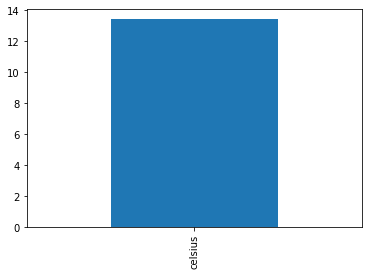

In [41]:
df[['Country', 'celsius']].groupby('Country').mean().sort_values(by='celsius', ascending=False).loc['US'].plot(kind='bar')

In [49]:
df_region = df[['Region', 'Year','celsius']].groupby(['Region', 'Year']).mean().reset_index()
print(df_region.head())

   Region  Year    celsius
0  Africa  1995  11.653743
1  Africa  1996   9.082433
2  Africa  1997   2.934720
3  Africa  1998  -0.929403
4  Africa  1999   1.196594


In [50]:
print(df_region.tail())

                                Region  Year    celsius
177  South/Central America & Carribean  2016  21.137797
178  South/Central America & Carribean  2017  21.084982
179  South/Central America & Carribean  2018  20.803734
180  South/Central America & Carribean  2019  20.908752
181  South/Central America & Carribean  2020  22.508655


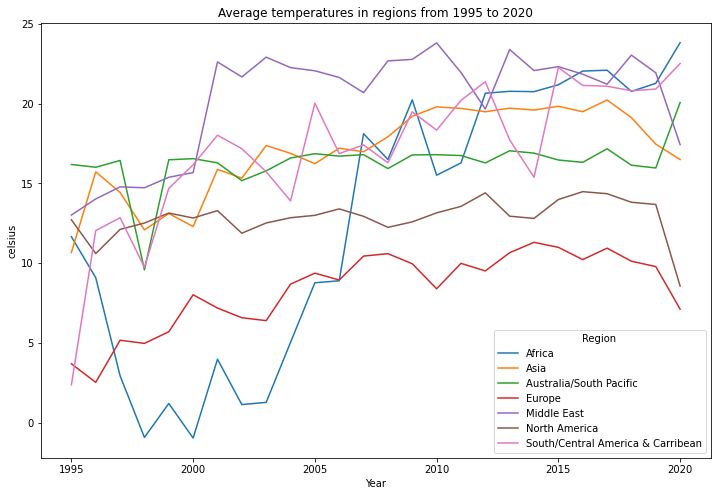

In [52]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='celsius', data=df_region, hue='Region')
plt.title('Average temperatures in regions from 1995 to 2020')
plt.show()